<a href="https://colab.research.google.com/github/cpetridis/pytorch-projects/blob/main/clas_problem_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Problems**

Classification Problems are about predicting if somoething is one thing.
For instance, Classification can predict whether an image has a dog or a cat inside. 

In [368]:
# we will use sklearn.datasets to get some data with numbers. Sometimes we 
# may need to convert let's say an image to numbers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.01, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(f"First five features in X:\n{X[:5]}")
print(f"First five features in y:\n{y[:5]}")



First five features in X:
[[ 0.76628562  0.21627572]
 [-0.77828546  0.13782611]
 [-0.80092515  0.12460507]
 [-0.35832587  0.71353535]
 [ 0.43881306 -0.89851131]]
First five features in y:
[1 1 1 1 0]


In [369]:
# Make DataFrame of circle data using pandas
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10) # display the first 10 elements

,X1,X2,label
0,0.766286,0.216276,1
1,-0.778285,0.137826,1
2,-0.800925,0.124605,1
3,-0.358326,0.713535,1
4,0.438813,-0.898511,0
5,-0.489407,0.644832,1
6,-0.011251,0.801074,1
7,0.783404,0.135993,1
8,-0.162953,-0.787075,1
9,-0.132355,1.000811,0


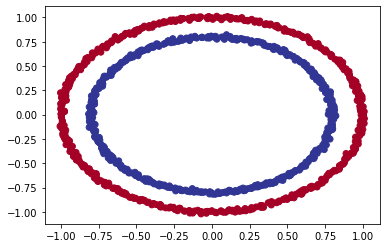

In [370]:
plt.scatter(x=X[:, 0], #this is X1. All values from X1 will be pointed to X-axis
            y=X[:, 1], #this is X2. All values from X2 will be pointed to Y-axis
            c=y,
            cmap=plt.cm.RdYlBu);


In [371]:
#we can see that our data is quite good and and a quite good shape with no covering each other
#this is due to the very small noise we added (noise=0.01)

#let's see how it will be with a little bit more noise.

# Create (new) circles
X_new, y_new = make_circles(n_samples,
                    noise=0.04, # a little bit more of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(f"First five features in X:\n{X_new[:5]}")
print(f"First five features in y:\n{y_new[:5]}")

# Make DataFrame of circle data using pandas
circles = pd.DataFrame({"X1_new": X_new[:, 0],
    "X2_new": X_new[:, 1],
    "label": y_new
})

circles.head(10) # display the first 10 elements


First five features in X:
[[ 0.74822656  0.23908325]
 [-0.74509559  0.16097526]
 [-0.82262532  0.19762051]
 [-0.41143316  0.68255648]
 [ 0.44390494 -0.89582949]]
First five features in y:
[1 1 1 1 0]


,X1_new,X2_new,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0
5,-0.474766,0.692236,1
6,-0.014847,0.804486,1
7,0.765568,0.153643,1
8,-0.172507,-0.796646,1
9,-0.116051,1.031858,0


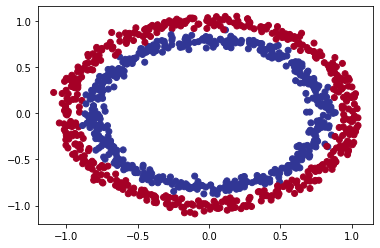

In [372]:
plt.scatter(x=X_new[:, 0], #this is X1_new. All values from X1 will be pointed to X-axis
            y=X_new[:, 1], #this is X2_new. All values from X2 will be pointed to Y-axis
            c=y_new,
            cmap=plt.cm.RdYlBu);

In [373]:
# both X and y are numpy arrays. We have to convert them to tensors
# we also have to convert their type because they have to be float32 but now they are float64

type(X) # ---> numpy.ndarray
X.dtype # ---> dtype('float64')

# torch.float is float32 by default
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(type(X)) # ---> 'torch.Tensor'
print(X.dtype) # ---> torch.float32
print(y.dtype) # ---> torch.float32
print(X[:5])
print(y[:5])

<class 'torch.Tensor'>
torch.float32
torch.float32
tensor([[ 0.7663,  0.2163],
        [-0.7783,  0.1378],
        [-0.8009,  0.1246],
        [-0.3583,  0.7135],
        [ 0.4388, -0.8985]])
tensor([1., 1., 1., 1., 0.])


In [374]:
# So, now we have to split our dataset to training and testing data
# for this purpose we are going to use the train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.2, random_state=42)

len(X_test), len(X_train) #len(test) has to be 200 and len(train) has to be 800 


(200, 800)

In [375]:
from IPython.utils.text import format_screen
#Let's build our model
#we will create 2 nn.Linear layers (one hidden layer and of course the output layer)
#that are capable of handling the shapes of our data.

from torch import nn

class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    #in our training examples we have 800 examples with a size of 2 each. 
    #so, for each let's say entry, we have two inputs and one outpout (0 or 1) --> (red or blue)
    self.layer_one = nn.Linear(in_features=2, out_features=5) # receive 2 features and upscales to 5 features 
    self.layer_two = nn.Linear(in_features=5, out_features=1) # receive 5 features from the outpout of layer_one and returns to a single feature

  def forward(self, x):
    return self.layer_two(self.layer_one(x)) # x is the input of layer_one and the output of that is the input in layer_two
  

my_model = ClassificationModel()
my_model



ClassificationModel(
  (layer_one): Linear(in_features=2, out_features=5, bias=True)
  (layer_two): Linear(in_features=5, out_features=1, bias=True)
)

In [376]:
#we can use Sequential in order to do the same thing, let's see:

class ClassificationModel_Seq(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self, x):
    return self.two_linear_layers(x)

my_SeqModel = ClassificationModel_Seq()
my_SeqModel

ClassificationModel_Seq(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [377]:
my_SeqModel.state_dict()

OrderedDict([('two_linear_layers.0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('two_linear_layers.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('two_linear_layers.1.bias', tensor([-0.1213]))])

In [378]:
# we have to setup a loss function and an optimizer
#nn.BCELoss has to be combined with sigmoid before.
my_loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss includes sigmoid and is more numerically stable than using a plain sigmoid followed by a BCELoss
my_optimizer = torch.optim.Adam(params=my_SeqModel.parameters(), lr=0.01)


# Let's calculate accuracy=true_positive/(true_positive + true_negative)*100
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100

  return acc

In [379]:
#build a training and testing loop

torch.manual_seed(42)
epochs = 100

# logits --> the output of our model
for epoch in range(epochs):
  my_SeqModel.train()
  y_logits = my_SeqModel(X_train).squeeze() # squeeze : removes the extra dimension from the tensor
  y_pred = torch.round(torch.sigmoid(y_logits))
  # we use BCEWithLogitsLoss as the loss_function, so we need raw logits.
  # In BCELoss we can provide our loss_function with torch.sigmoid(y_logits) like my_loss_fn(torch.sigmoid(y_logits), y_train)
  # but .. BCEWithLogitsLoss is more numerically stable
  loss = my_loss_fn(y_logits, y_train) 
  my_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  my_optimizer.zero_grad()
  loss.backward() # backpropagation
  my_optimizer.step()

  my_SeqModel.eval()
  with torch.inference_mode():
    test_logits = my_SeqModel(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = my_loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%10 == 0:
    print(f" Epoch: {epoch} ---- Loss: {loss:.5f} ---- Acc: {my_acc:.2f}% ---- Test loss: {test_loss:.5f} ---- Test acc: {test_acc:.2f}%")


 Epoch: 0 ---- Loss: 0.69790 ---- Acc: 52.12% ---- Test loss: 0.69370 ---- Test acc: 57.00%
 Epoch: 10 ---- Loss: 0.69342 ---- Acc: 50.00% ---- Test loss: 0.69367 ---- Test acc: 40.50%
 Epoch: 20 ---- Loss: 0.69312 ---- Acc: 52.25% ---- Test loss: 0.69610 ---- Test acc: 46.50%
 Epoch: 30 ---- Loss: 0.69305 ---- Acc: 50.00% ---- Test loss: 0.69518 ---- Test acc: 47.00%
 Epoch: 40 ---- Loss: 0.69300 ---- Acc: 51.88% ---- Test loss: 0.69441 ---- Test acc: 47.00%
 Epoch: 50 ---- Loss: 0.69299 ---- Acc: 50.50% ---- Test loss: 0.69443 ---- Test acc: 46.50%
 Epoch: 60 ---- Loss: 0.69298 ---- Acc: 51.75% ---- Test loss: 0.69479 ---- Test acc: 45.00%
 Epoch: 70 ---- Loss: 0.69298 ---- Acc: 51.00% ---- Test loss: 0.69478 ---- Test acc: 45.50%
 Epoch: 80 ---- Loss: 0.69298 ---- Acc: 51.00% ---- Test loss: 0.69466 ---- Test acc: 45.50%
 Epoch: 90 ---- Loss: 0.69298 ---- Acc: 51.25% ---- Test loss: 0.69466 ---- Test acc: 45.50%


helper_functions.py already exists. No need for downloading


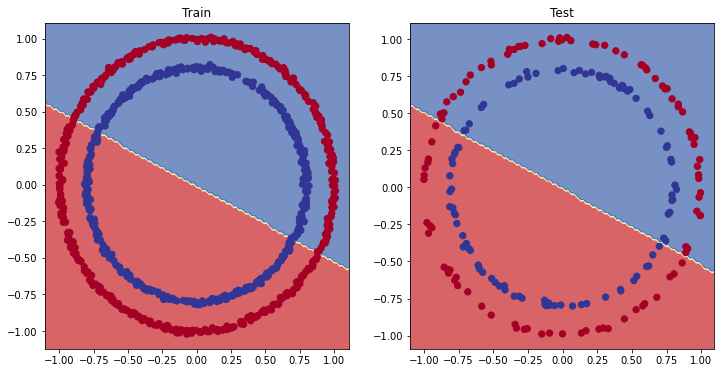

In [380]:
# As can easily see from the metrics above, it looks like our model isn't learing anything
# we will use some already defined functions from :
# https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

import requests
from pathlib import Path

FILE_NAME = "helper_functions.py"
if Path(FILE_NAME).is_file():
  print(f"{FILE_NAME} already exists. No need for downloading")
else:
  print(f"Downloading {FILE_NAME}.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open(FILE_NAME, "wb") as fd:
    fd.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_SeqModel, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_SeqModel, X_test, y_test)


In [381]:
# so, the reason for the roughly 50% accuracy (actually 45%) is because our model
# is trying to split the data in the middle but our data our circular. (?)

# what can we do to imporve our model?
# 1. Add more hidden layers (model has more chances to learn)
# 2. Add more hidden units in the layers 
# 3. Fit for longer (i.e. 10X epochs)
# 4. Change the activation and/or loss function
# 5. Change the learning rate


class ClassificationModel_Seq_Optim(nn.Module):
  def __init__(self):
    super().__init__()
    self.five_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=1)
    )

  def forward(self, x):
    return self.five_linear_layers(x)

my_Optim_SeqModel = ClassificationModel_Seq_Optim()
# my_Optim_SeqModel.state_dict()


In [382]:

torch.manual_seed(42)
epochs = 1000

# logits --> the output of our model
for epoch in range(epochs):
  my_Optim_SeqModel.train()
  y_logits = my_Optim_SeqModel(X_train).squeeze() # squeeze : removes the extra dimension from the tensor
  y_pred = torch.round(torch.sigmoid(y_logits))
  # we use BCEWithLogitsLoss as the loss_function, so we need raw logits.
  # In BCELoss we can provide our loss_function with torch.sigmoid(y_logits) like my_loss_fn(torch.sigmoid(y_logits), y_train)
  # but .. BCEWithLogitsLoss is more numerically stable
  loss = my_loss_fn(y_logits, y_train) 
  my_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  my_optimizer.zero_grad()
  loss.backward() # backpropagation
  my_optimizer.step()

  my_Optim_SeqModel.eval()
  with torch.inference_mode():
    test_logits = my_Optim_SeqModel(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = my_loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%50 == 0:
    print(f" Epoch: {epoch} ---- Loss: {loss:.5f} ---- Acc: {my_acc:.2f}% ---- Test loss: {test_loss:.5f} ---- Test acc: {test_acc:.2f}%")

 Epoch: 0 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 50 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 100 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 150 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 200 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 250 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 300 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 350 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 400 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 450 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss: 0.69427 ---- Test acc: 49.50%
 Epoch: 500 ---- Loss: 0.69717 ---- Acc: 47.25% ---- Test loss:

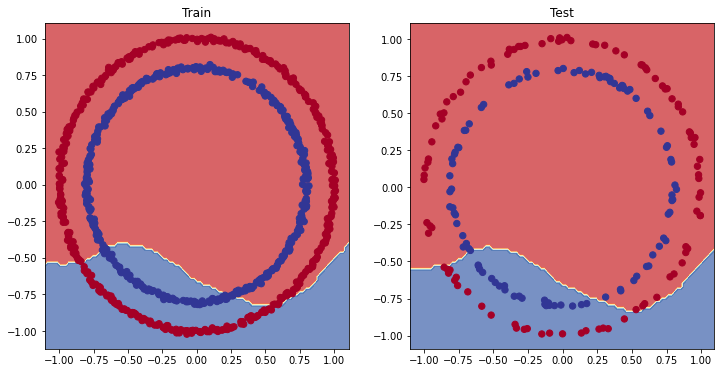

In [383]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_Optim_SeqModel, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_Optim_SeqModel, X_test, y_test)

In [384]:
# let's see if our my_Optim_SeqModel can learn anything
# in linear regression problem

# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
# X_regression[:5], y_regression[:5]

# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))



100
80 80 20 20


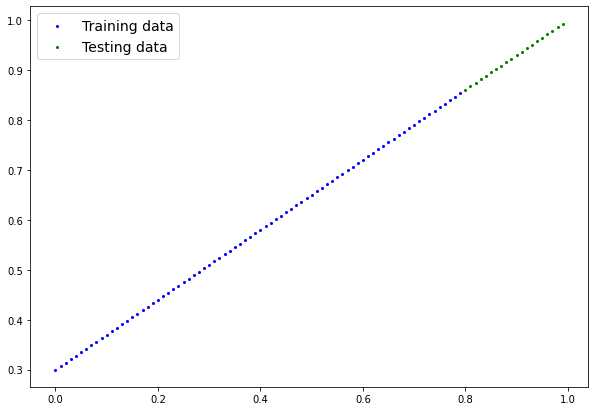

In [385]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [386]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [387]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [388]:

torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


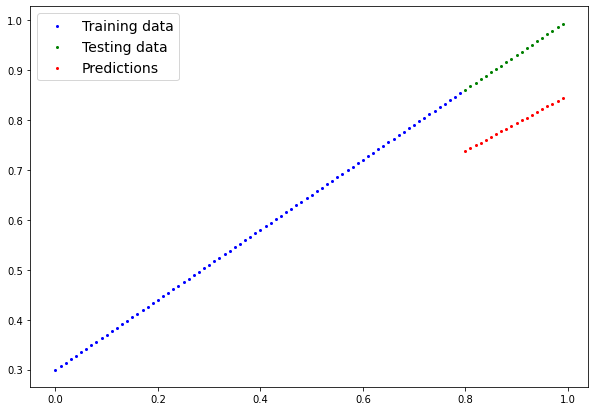

In [389]:
# Turn on evaluation mode
my_Optim_SeqModel.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds);

In [390]:
# Okay, our model works fine on linear data.
#Now, we are going to use some non-linear activation fuctions such as ReLU



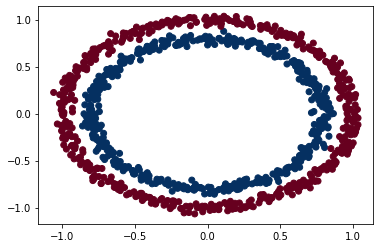

In [391]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [392]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

In [393]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [394]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [395]:
torch.manual_seed(42)
epochs = 3000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

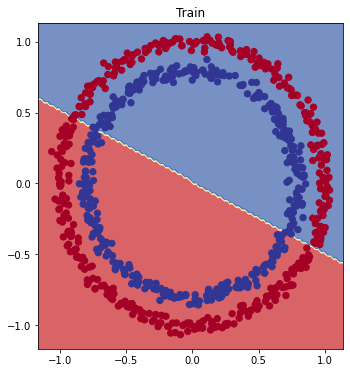

In [402]:
# let's make predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_SeqModel, X_train, y_train)



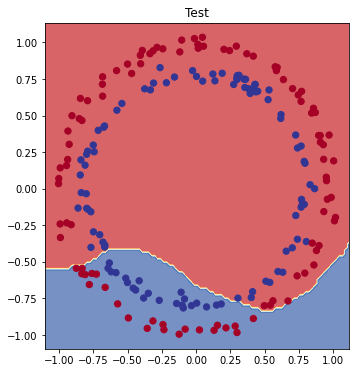

In [404]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(my_Optim_SeqModel, X_test, y_test)


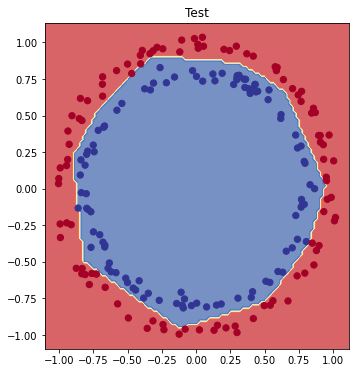

In [405]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)